In [379]:
import pandas as pd
import numpy as np
#Vizualizations library
import matplotlib.pyplot as plt
import seaborn as sns
#Machine Learning library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score ,mean_squared_error
from math import sqrt


Collecting data & EDA

In [341]:
VG_df=pd.read_csv('vgsales.csv')
VG_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [342]:
VG_df.dtypes

Rank              int64
Name             object
Platform         object
Year             object
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [343]:
# to know if there are null values
VG_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      2
dtype: int64

In [344]:
# delete rows that contain null values in the All feature
VG_df.isna().sum(axis=1).shape
VG_df.dropna(inplace=True)
VG_df.shape
VG_df.isna().sum(axis=0)

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [345]:
VG_nan = VG_df[VG_df.isna().any(axis=1)] 
VG_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          0 non-null      int64  
 1   Name          0 non-null      object 
 2   Platform      0 non-null      object 
 3   Year          0 non-null      object 
 4   Genre         0 non-null      object 
 5   Publisher     0 non-null      object 
 6   NA_Sales      0 non-null      float64
 7   EU_Sales      0 non-null      float64
 8   JP_Sales      0 non-null      float64
 9   Other_Sales   0 non-null      float64
 10  Global_Sales  0 non-null      float64
dtypes: float64(5), int64(1), object(5)
memory usage: 0.0+ bytes


In [346]:
#delete Rank column 
VG_df.drop('Rank', axis=1,inplace=True)
VG_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [347]:
## to know if there are duplicate

VG_df.duplicated().sum()

0

In [348]:
#cheking DataFram types
VG_df.dtypes 

#Chnage type of Year
VG_df['Year']=VG_df.Year.astype('int64')

VG_df.dtypes.copy

<bound method NDFrame.copy of Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object>

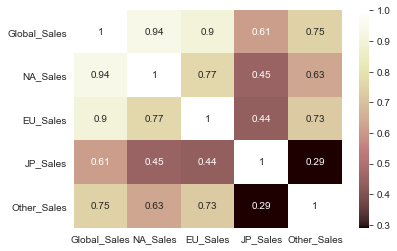

In [350]:
#Correlation of sales in different countries.
c=VG_df[['Global_Sales','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
c
sns.heatmap(c.corr(), annot=True ,cmap='pink')
plt.show()
#According to table, We see that Global,North American,European an Other countries markets (Except Japan),have strong correlated
#but on Japanese market is weakly correlated with other local markets.

Q1: What is the highest selling type of video game in global sales and North America

C:\Users\72rin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(Text(0, 0.5, 'Global \n'),)

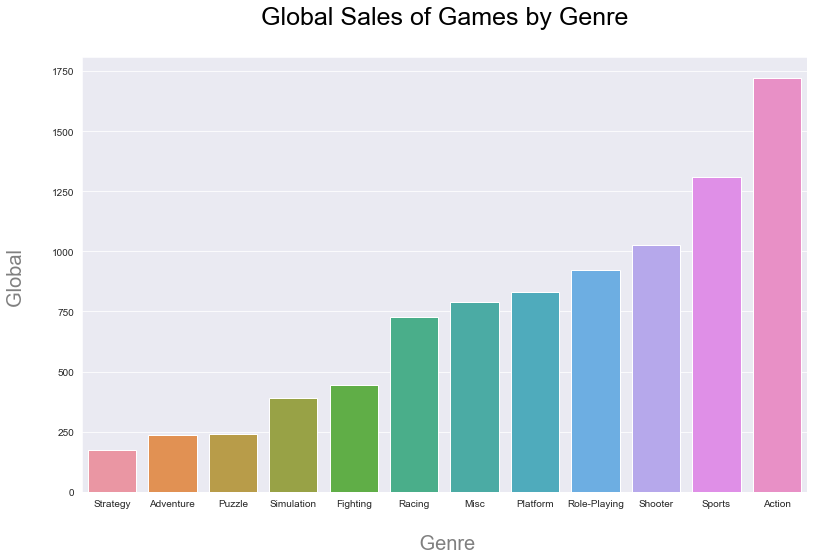

In [351]:
# Total global sales based on Genre
VG_genre = VG_df.groupby('Genre').agg({'Global_Sales':np.sum}).sort_values('Global_Sales')
plt.subplots(figsize=(13,8))
x = VG_genre.index
y =VG_genre.Global_Sales
ax = sns.barplot(x, y)
ax.set_title('Global Sales of Games by Genre\n', color='black', size=25)
ax.set_xlabel('\n Genre', color='gray', size=20)
ax.set_ylabel('Global \n', color='gray', size=20),

Text(0, 0.5, 'NA Sales \n')

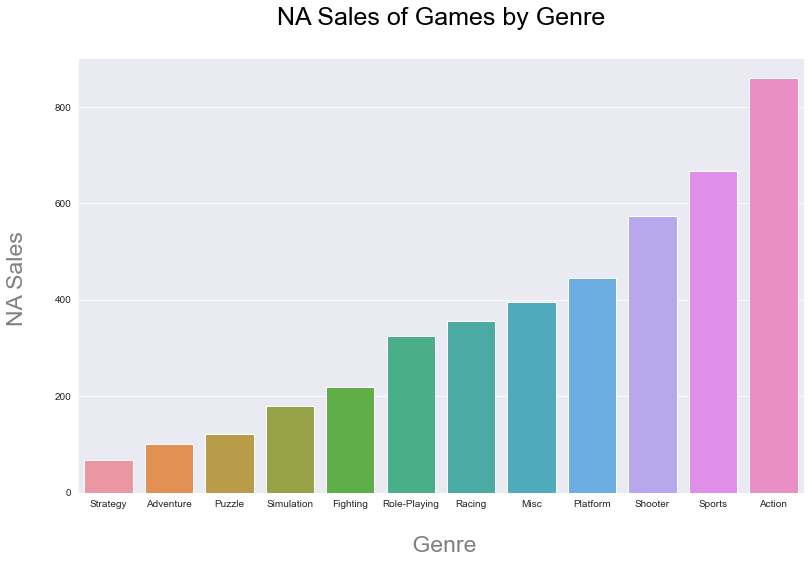

In [352]:
# Total NA sales based on Genre
GS_genre = VG_df.groupby('Genre').agg({'NA_Sales':np.sum}).sort_values('NA_Sales')
plt.subplots(figsize=(13,8))
ax = sns.barplot(x=GS_genre.index, y=GS_genre.NA_Sales)
ax.set_title('NA Sales of Games by Genre\n', color='black', size=25)
ax.set_xlabel('\n Genre', color='gray', size=23)
ax.set_ylabel('NA Sales \n', color='gray', size=23)

Q2: Who are the most popular publishers in Global Sales?

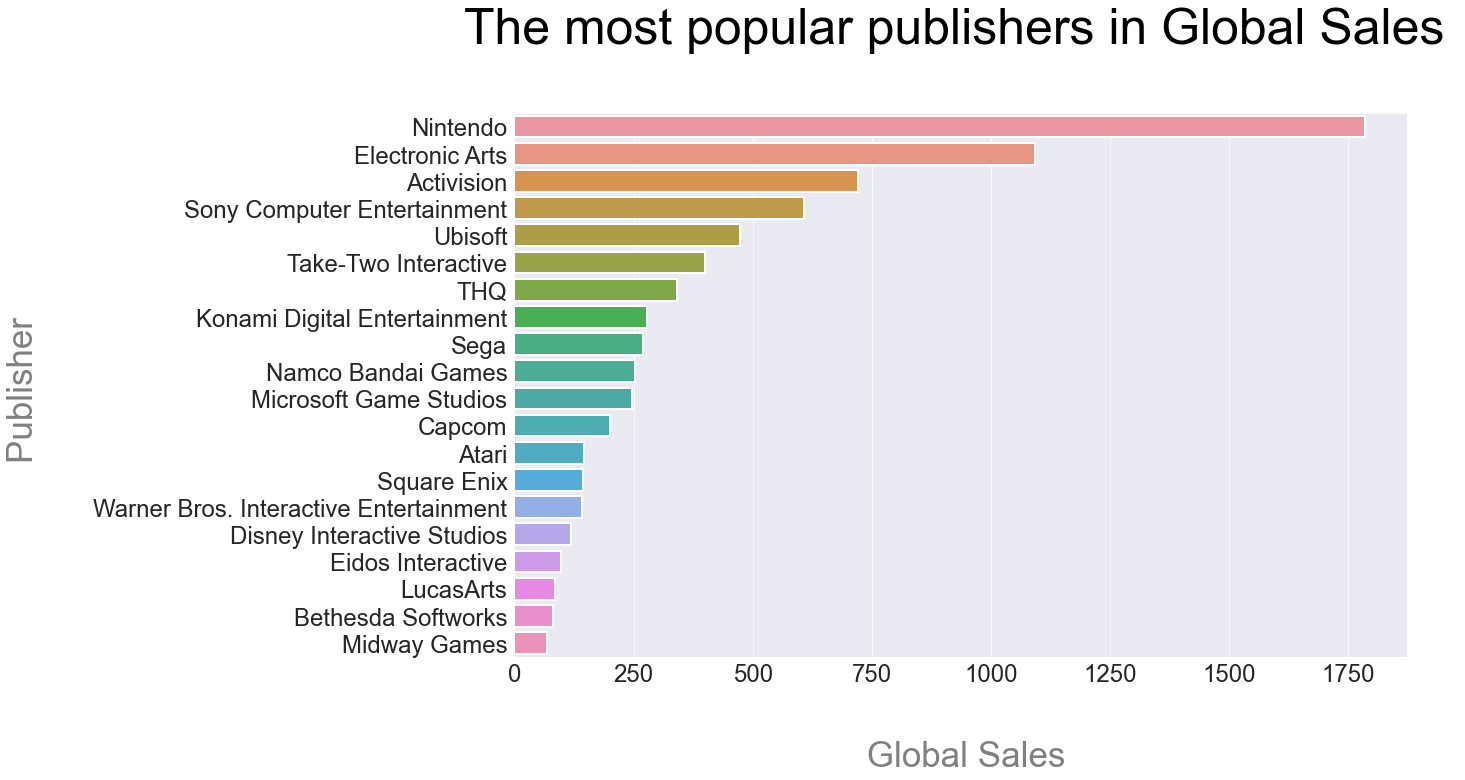

In [353]:
top_pub=VG_df.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending = False).reset_index().head(20)
plt.figure(figsize = (16,10))
sns.barplot(x=top_pub["Global_Sales"], y=top_pub["Publisher"],linewidth=2)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel("Publisher \n", color='gray',labelpad=15, fontsize=35)
plt.xlabel("\n Global Sales", color='gray',labelpad=15, fontsize=35)
plt.title("The most popular publishers in Global Sales \n", color='black', fontsize=50, y=1.02)
ax = plt.gca()
plt.show();

Q3: Which is the most popular Platform in Global Sales?

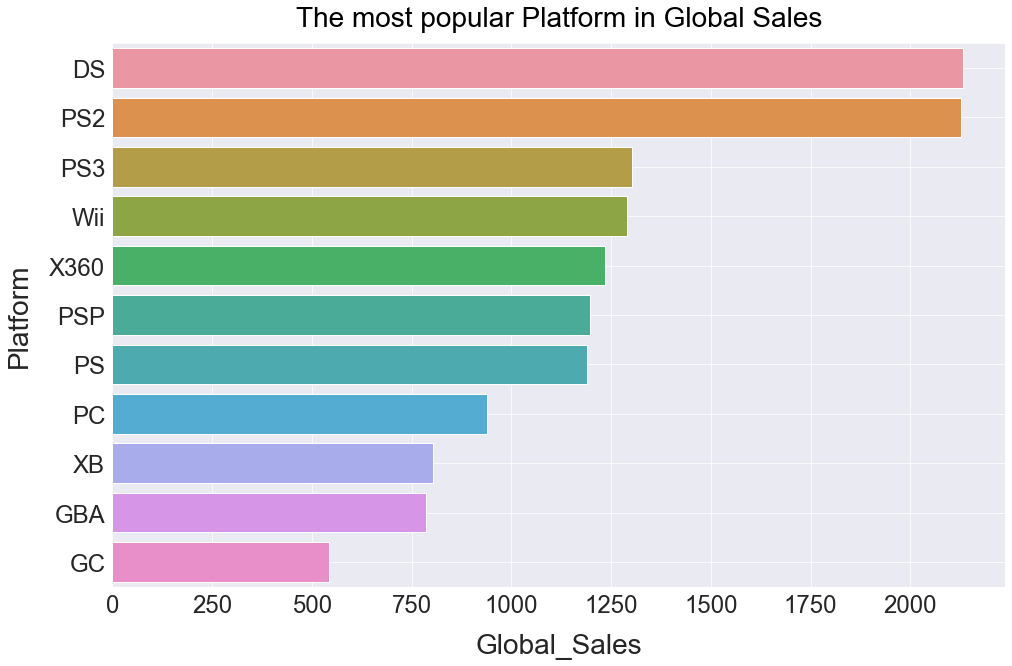

In [354]:
sns.set_style("darkgrid")
num_games=VG_df.groupby('Platform').size().sort_values(ascending=False).reset_index()[:11]
num_games.columns=['Platform', 'Global_Sales']
plt.figure(figsize=(16,10))
sns.barplot(y=num_games["Platform"], x=num_games["Global_Sales"], linewidth=1)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel("Platform", labelpad=16, fontsize=28)
plt.xlabel("Global_Sales", labelpad=16, fontsize=28)
plt.grid(True)
plt.title("The most popular Platform in Global Sales", color='Black', fontsize=28, y=1.02)
plt.show();
#DS is having highest values

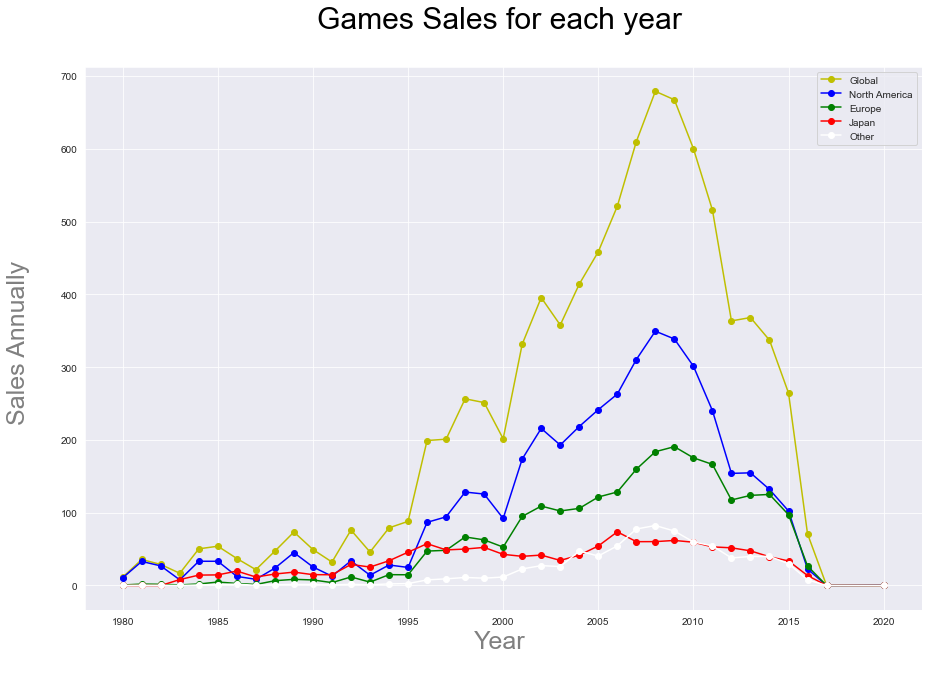

In [355]:
year_df = VG_df.groupby('Year')[['Global_Sales','NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].sum()

plt.figure(figsize=(15,10))

plt.plot(year_df.Global_Sales, 'o-y')
plt.plot(year_df.NA_Sales, 'o-b')
plt.plot(year_df.EU_Sales, 'o-g')
plt.plot(year_df.JP_Sales, 'o-r')
plt.plot(year_df.Other_Sales, 'o-w')


plt.xlabel('Year \n',fontsize=25,color='gray')
plt.ylabel('Sales Annually \n',fontsize=25,color='gray')
plt.title('Games Sales for each year \n',fontsize=30,color='black')
plt.legend(['Global','North America', 'Europe', 'Japan','Other']);

#n the above graph, we see that Global  typically has had higher sales over the years for video games
#  and the lowest sales is Japan.

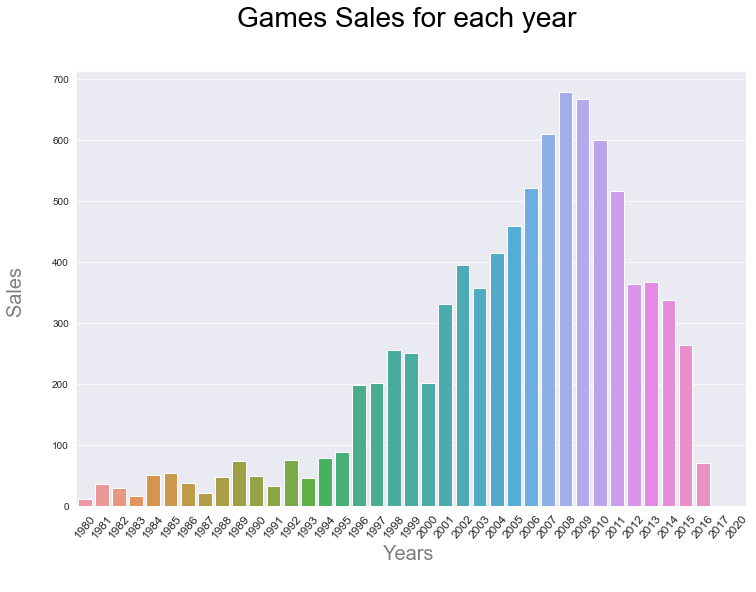

In [432]:
year = VG_df.groupby(['Year']).sum()
plt.figure(figsize=(12,8))
plt.title('Games Sales for each year \n', color='Black', fontsize=28, y=1.02)
ax = sns.barplot(x=y.index.astype(int),y= year['Global_Sales'])
ax.set_xlabel(xlabel='Years \n', fontsize=20,color='gray')
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Sales \n', fontsize=20,color='gray')

plt.show();

In [426]:
#VG_df.loc[VG_df.Year ==2020,:]


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [425]:
#sns.pairplot(c);
#There is corelated i between Global,North America,Europe,Japan and Other Countries.

Builiding the model

In [ ]:
x = VG_df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = VG_df[['Global_Sales']]

#Splitting into train and test sets for both parameters

x_train, x_test, YY_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)
# Building the model:

lr = LinearRegression()
# Fit the model on training data:

lr.fit(x_train, YY_train)

# Predict the testing data:
lr_predict = lr.predict(x_test)
lr_predict

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

distortions = []
K = range(2, 30)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(x_train, YY_train)
    k_means.fit(x_train, YY_train)
    distortions.append(sum(np.min(cdist(x_train, YY_train, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

In [ ]:
lr_predict

In [ ]:
YY_train

In [ ]:
YY_train=pd.DataFrame(y_train).to_numpy()
YY_train.astype

In [ ]:
YY_train.astype

In [ ]:
#Comparison between Actual and Predicted value.

df1 = pd.DataFrame({'Actual': [YY_train* 100], 'Predicted': [lr_predict*100]})
df1.head()


In [ ]:

# Show R_Squared on the training data 
R2=lr.score(x_train, y_train)
print('R^2 Score trining data:',R2 * 100,"%")

# Show R-squared value of the model on the predict data
r2=r2_score(y_test, lr_predict)
print('R^2 Score testing data:',r2 * 100,"%")

In [ ]:
print("X_train shape: {}".format(x_train.shape))
print("Y_train shape: {}".format(YY_train.shape))

print("X_test shape: {}".format(x_test.shape))
print("Y_test shape: {}".format(y_test.shape))

In [ ]:
# Compare the actual y values in the training set with the predicted values
#y_actual_train = y_train
#y_predicted_train = lr.predict(x_train)
#y_predicted_train.shape


In [ ]:
# Compare the actual y values in the test set with the predicted values
#y_actual_test = df_test['y']
#y_predicted_test = lr.predict(df_test[['x1','x2']])
#y_predicted_test.shape

Text(0, 0.5, 'Predicted')

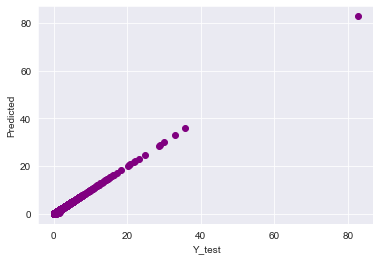

In [420]:
plt.scatter(y_test,lr_predict, color="purple")
plt.xlabel('Y_test')
plt.ylabel('Predicted')
#plt.plot(x_test,lr_predict, color="blue")

In [ ]:
from sklearn.decomposition import PCA

# Take all of the data and plot it on 2 dimensions
pca = PCA(n_components=2)
pca.fit(x_train)
pcafeatures_train = pca.transform(x_train) #extract to new features
pcafeatures_train.shape

In [418]:
# Create a plot of the PCA results
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle(['r','g','b','c','m','y','orange','w','aqua','yellow'])
    target_ids = range(len(target_names))
    plt.figure(figsize=(10,10))
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label, edgecolors='gray')
    plt.legend()

In [ ]:
pca.explained_variance_ratio_ 

In [ ]:
# to understand the importance of each variable in each PC, look at the correlations:

pd.DataFrame(pca.components_, index = ['PC1','PC2'])

# remember, signs don't matter, just direction in space

In [416]:

from sklearn.decomposition import PCA

# Take all of the data and plot it on 2 dimensions
pca = PCA(n_components=2)
pca.fit(x_train)
pcafeatures_train = pca.transform(x_train) #extract to new features
pcafeatures_train.shape
pca.explained_variance_ratio_

array([0.95972433, 0.03344622])

In [365]:
from sklearn.cluster import KMeans
from scipy import cluster

In [366]:
#kmeans= KMeans(n_clusters = 3, random_state =0)
#kmeans.fit(x_train)
#cluster_nums = kmeans.predict (x_train)
#kmeans.inertia_ #This k-means inertia tells how internally coherent the clusters are. Although not the smallest number, if we were to decrease it more it would increase the number of clusters and we want a balance of the two.

25877.924171077335

Text(0, 0.5, 'Inertia')

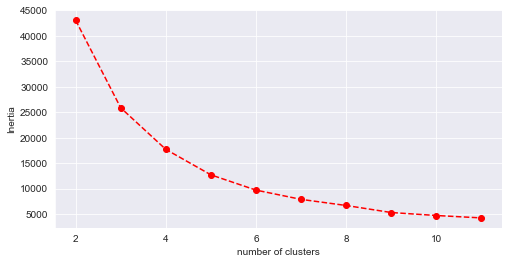

In [390]:
#iner = []
#k =3
#kmeans = KMeans(n_clusters=k)
#ks = list(range(2,12))
#for k in ks:
    #kmeans = KMeans(n_clusters=k)
    #pred_labels = kmeans.fit_predict(x_train)
    #iner.append(kmeans.inertia_)

#plt.figure(figsize=(8,4))
#plt.plot(ks, iner, 'ro--')
#plt.xlabel('number of clusters')
#plt.ylabel('Inertia')
#In this graph, the value of inertia decreases as the number of clusters increase. So there is a trade-off here.The elbow point (cluster = 6) in the inertia graph is a good choice because after that the change in the value of inertia isn’t significant.

In [415]:
#x = VG_df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
#y = VG_df[['Global_Sales']]

#Splitting into train and test sets for both parameters

#x_train, x_test, YY_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)
#from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestRegressor()
#rf.fit(x_train,YY_train)
#rf_predictions = rf.predict(x_test)
#rf_predictions

<ipython-input-415-728465da6930>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,YY_train)


array([0.1414    , 0.01      , 0.02002   , ..., 0.01420732, 0.9538    ,
       0.1457    ])

ModuleNotFoundError: No module named 'STOPWORDS'